In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [60]:
timezandmeanz_df = pd.read_csv(r'C:/Users/douge/Python Notebooks/Transport Data/travel time x means of transit.csv')

In [64]:
timezandmeanz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13731 entries, 0 to 13730
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   RESIDENCE                   13729 non-null  object
 1   Travel Time 12              13728 non-null  object
 2   Means of Transportation 11  13728 non-null  object
 3   Output                      13728 non-null  object
 4   Workers 16 and Over         13728 non-null  object
dtypes: object(5)
memory usage: 536.5+ KB


In [75]:
timezandmeanz_df.head()

,RESIDENCE,Travel Time 12,Means of Transportation 11,Output,Workers 16 and Over
0,Alabama,All workers,"Total, means of transportation",Estimate,"2,014,825"
2,Alabama,All workers,"Car, truck, or van -- Drove alone",Estimate,"1,727,280"
4,Alabama,All workers,"Car, truck, or van -- In a 2-person carpool",Estimate,"138,265"
6,Alabama,All workers,"Car, truck, or van -- In a 3-or-more person ca...",Estimate,"38,275"
8,Alabama,All workers,Bus or trolley bus,Estimate,"7,315"


In [74]:
timezandmeanz_df.drop(timezandmeanz_df.loc[timezandmeanz_df['Output']=='Margin of Error'].index, inplace=True)

In [5]:
pov_df.head()

,RESIDENCE,Poverty Status 4,Time Leaving Home 17,Output,Workers with Poverty Status
0,Alabama,"Total, poverty status",All workers,Estimate,"2,004,020"
2,Alabama,"Total, poverty status",Did not work at home:,Estimate,"1,946,875"
4,Alabama,"Total, poverty status",5:00 a.m. to 5:29 a.m.,Estimate,"93,275"
6,Alabama,"Total, poverty status",5:30 a.m. to 5:59 a.m.,Estimate,"118,035"
8,Alabama,"Total, poverty status",6:00 a.m. to 6:29 a.m.,Estimate,"204,085"


In [6]:
pov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3539 entries, 0 to 7074
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   RESIDENCE                    3537 non-null   object
 1   Poverty Status 4             3536 non-null   object
 2   Time Leaving Home 17         3536 non-null   object
 3   Output                       3536 non-null   object
 4   Workers with Poverty Status  3536 non-null   object
dtypes: object(5)
memory usage: 165.9+ KB


In [7]:
#cleaning up column names and dropping unwanted data
pov_df.rename(columns={'Time Leaving Home 17':'Time'},inplace=True)

In [9]:
#cleaning up column names and dropping unwanted data
pov_df['Workers with Poverty Status'].replace(to_replace=',', value='', inplace=True,regex=True)
pov_df['Workers with Poverty Status'] = pov_df['Workers with Poverty Status'].astype('float',copy=False)

In [10]:
#cleaning up column names and dropping unwanted data
pov_df = pov_df.drop(pov_df.loc[pov_df['Poverty Status 4']=='Total, poverty status'].index)
pov_df.drop(pov_df.loc[pov_df['Time']=='Did not work at home:'].index, inplace=True)
pov_df.drop(pov_df.loc[pov_df['Time']=='All workers'].index, inplace=True)

In [11]:
sevenohtwo_df = pov_df[pov_df.Time == '7:00 a.m. to  7:29 a.m.']

In [12]:
pov_df.head()

,RESIDENCE,Poverty Status 4,Time,Output,Workers with Poverty Status
38,Alabama,Below 100 percent of the poverty level,5:00 a.m. to 5:29 a.m.,Estimate,6320.0
40,Alabama,Below 100 percent of the poverty level,5:30 a.m. to 5:59 a.m.,Estimate,7875.0
42,Alabama,Below 100 percent of the poverty level,6:00 a.m. to 6:29 a.m.,Estimate,14165.0
44,Alabama,Below 100 percent of the poverty level,6:30 a.m. to 6:59 a.m.,Estimate,14345.0
46,Alabama,Below 100 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,18205.0


In [13]:
sevenohtwo_df

,RESIDENCE,Poverty Status 4,Time,Output,Workers with Poverty Status
46,Alabama,Below 100 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,18205.0
80,Alabama,100 to 149 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,20635.0
114,Alabama,At or above 150 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,279185.0
182,Alaska,Below 100 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,1190.0
216,Alaska,100 to 149 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,1465.0
...,...,...,...,...,...
6880,Wyoming,100 to 149 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,1900.0
6914,Wyoming,At or above 150 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,36540.0
6982,Puerto Rico,Below 100 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,32690.0
7016,Puerto Rico,100 to 149 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,30985.0


In [15]:
#make pivot table and rearrange columns
sevenohtwo_pivot = pd.pivot_table(pov_df[pov_df.Time == '7:00 a.m. to  7:29 a.m.'],'Workers with Poverty Status','RESIDENCE','Poverty Status 4',aggfunc='sum')
sevenohtwo_pivot.rename(columns={'Below 100 percent of the poverty level':'Below 100','100 to 149 percent of the poverty level':'100 to 149','At or above 150 percent of the poverty level':'Above 150'},inplace=True)
sevenohtwo_pivot = sevenohtwo_pivot.reindex(columns=['Below 100','100 to 149','Above 150'])

In [14]:
#make crosstab and rearrange columns
sevenohtwo_ct = pd.crosstab(index=pov_df['RESIDENCE'],columns=pov_df['Poverty Status 4'],values=pov_df['Workers with Poverty Status'],aggfunc='sum',normalize='index',margins=True,margins_name='Total')
sevenohtwo_ct.rename(columns={'Below 100 percent of the poverty level':'Below 100','100 to 149 percent of the poverty level':'100 to 149','At or above 150 percent of the poverty level':'Above 150'},inplace=True)
sevenohtwo_ct = sevenohtwo_ct.reindex(columns=['Below 100','100 to 149','Above 150'])

In [16]:
sevenohtwo_ct

Poverty Status 4,Below 100,100 to 149,Above 150
RESIDENCE,,,
Alabama,0.082951,0.077699,0.839350
Alaska,0.043369,0.047455,0.909176
Arizona,0.088241,0.079581,0.832179
Arkansas,0.088883,0.087190,0.823928
California,0.075290,0.074802,0.849908
Colorado,0.065797,0.059331,0.874872
Connecticut,0.042433,0.040105,0.917462
Delaware,0.052946,0.052807,0.894247
District of Columbia,0.061057,0.046622,0.892321


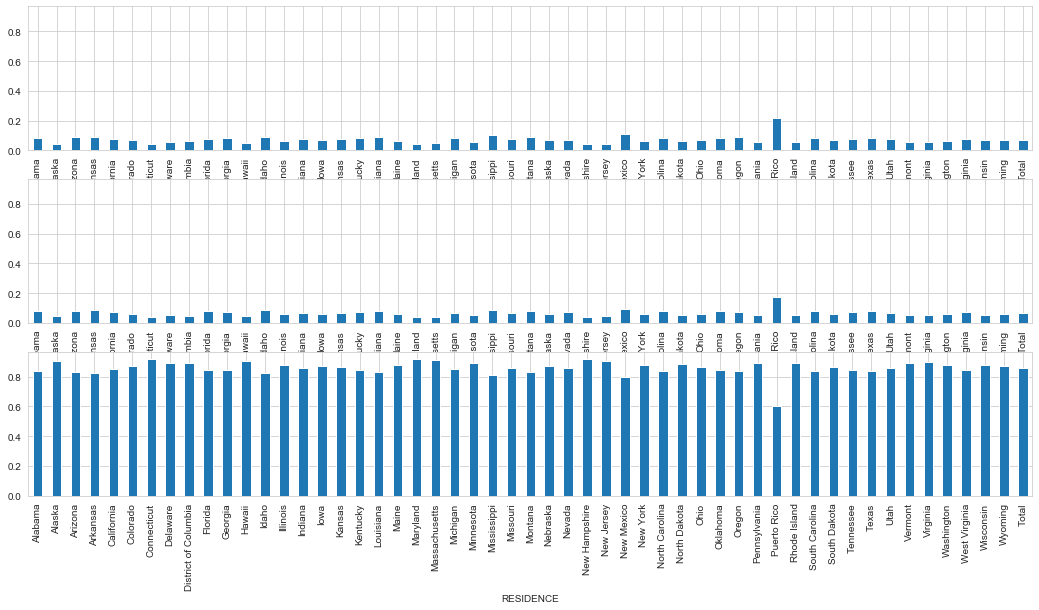

In [26]:
#what percentage of poverty level, by state, leave the house at some time between 7:00 am and 7:30?
fig, axes = plt.subplots(nrows=3, ncols=1,sharey=True)

sevenohtwo_ct['Below 100'].plot(kind='bar',figsize=(18,9),ax=axes[0])
sevenohtwo_ct['100 to 149'].plot(kind='bar',figsize=(18,9),ax=axes[1])
sevenohtwo_ct['Above 150'].plot(kind='bar',figsize=(18,9),ax=axes[2])


In [29]:
sevenohtwo_pivot.head()

Poverty Status 4,Below 100,100 to 149,Above 150
RESIDENCE,,,
Alabama,18205.0,20635.0,279185.0
Alaska,1190.0,1465.0,41260.0
Arizona,26290.0,26515.0,329605.0
Arkansas,13360.0,16030.0,182920.0
California,142355.0,155325.0,1911960.0


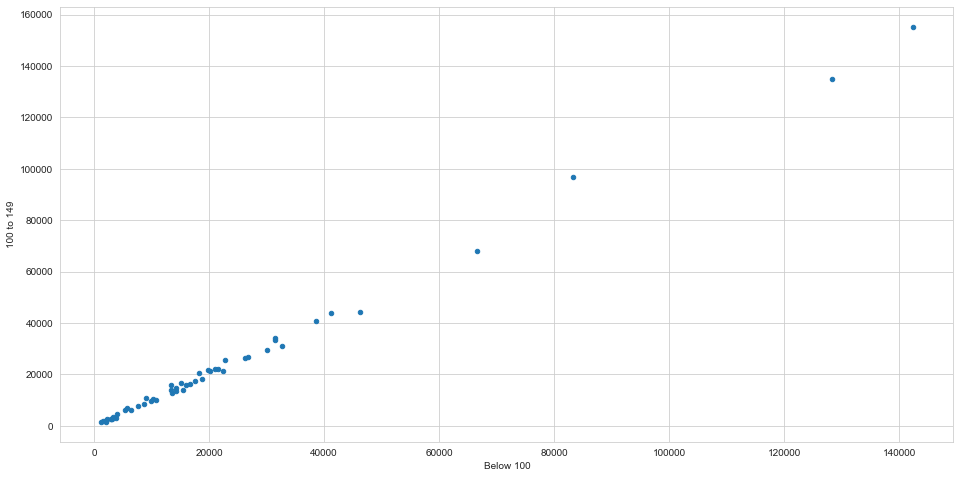

In [38]:
sevenohtwo_pivot.plot(kind='scatter',x='Below 100',y='100 to 149',figsize=(16,8))

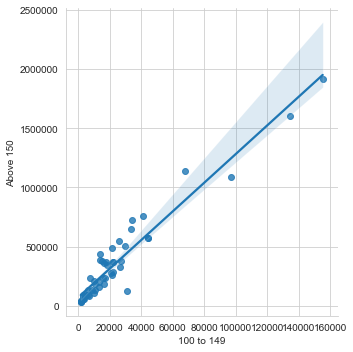

In [54]:
sns.lmplot('100 to 149','Above 150',data=sevenohtwo_pivottwo)

In [28]:
pov_df.head()

,RESIDENCE,Poverty Status 4,Time,Output,Workers with Poverty Status
38,Alabama,Below 100 percent of the poverty level,5:00 a.m. to 5:29 a.m.,Estimate,6320.0
40,Alabama,Below 100 percent of the poverty level,5:30 a.m. to 5:59 a.m.,Estimate,7875.0
42,Alabama,Below 100 percent of the poverty level,6:00 a.m. to 6:29 a.m.,Estimate,14165.0
44,Alabama,Below 100 percent of the poverty level,6:30 a.m. to 6:59 a.m.,Estimate,14345.0
46,Alabama,Below 100 percent of the poverty level,7:00 a.m. to 7:29 a.m.,Estimate,18205.0


In [43]:
#make a pivot table: totals workers by poverty level and by time
totalworkersbytime_pivot=pd.pivot_table(pov_df,'Workers with Poverty Status','Time','Poverty Status 4',aggfunc='sum')

In [44]:
#clean up columns
totalworkersbytime_pivot.rename(columns={'Below 100 percent of the poverty level':'Below 100','100 to 149 percent of the poverty level':'100 to 149','At or above 150 percent of the poverty level':'Above 150'},inplace=True)
totalworkersbytime_pivot = totalworkersbytime_pivot.reindex(columns=['Below 100','100 to 149','Above 150'])

In [47]:
#clean up rows
times = ['5:00 a.m. to  5:29 a.m.',
         '5:30 a.m. to  5:59 a.m.',
         '6:00 a.m. to  6:29 a.m.',
         '6:30 a.m. to  6:59 a.m.',
         '7:00 a.m. to  7:29 a.m.',
         '7:30 a.m. to 7:59 a.m.',
         '8:00 a.m. to  8:29 a.m.',
         '8:30 a.m. to 8:59 a.m.',
         '9:00 a.m. to  9:59 a.m.',
         '10:00 a.m. to 10:59 a.m.',
         '11:00 a.m. to 11:59 a.m.',
         '12:00 p.m. to  3:59 p.m.',
         '4:00 p.m. to 11:59 p.m.',
         '12:00 a.m. to 4:59 a.m.']
totalworkersbytime_pivot = totalworkersbytime_pivot.reindex(axis='index', labels=times)

In [48]:
totalworkersbytime_pivot

Poverty Status 4,Below 100,100 to 149,Above 150
Time,,,
5:00 a.m. to 5:29 a.m.,354540.0,397550.0,4609285.0
5:30 a.m. to 5:59 a.m.,390230.0,457680.0,5899930.0
6:00 a.m. to 6:29 a.m.,757020.0,819875.0,10733085.0
6:30 a.m. to 6:59 a.m.,697225.0,779580.0,12286615.0
7:00 a.m. to 7:29 a.m.,1143285.0,1196965.0,18286950.0
7:30 a.m. to 7:59 a.m.,893195.0,902275.0,15732090.0
8:00 a.m. to 8:29 a.m.,1020530.0,919085.0,13463300.0
8:30 a.m. to 8:59 a.m.,497800.0,430915.0,6556415.0
9:00 a.m. to 9:59 a.m.,814135.0,656860.0,7306150.0


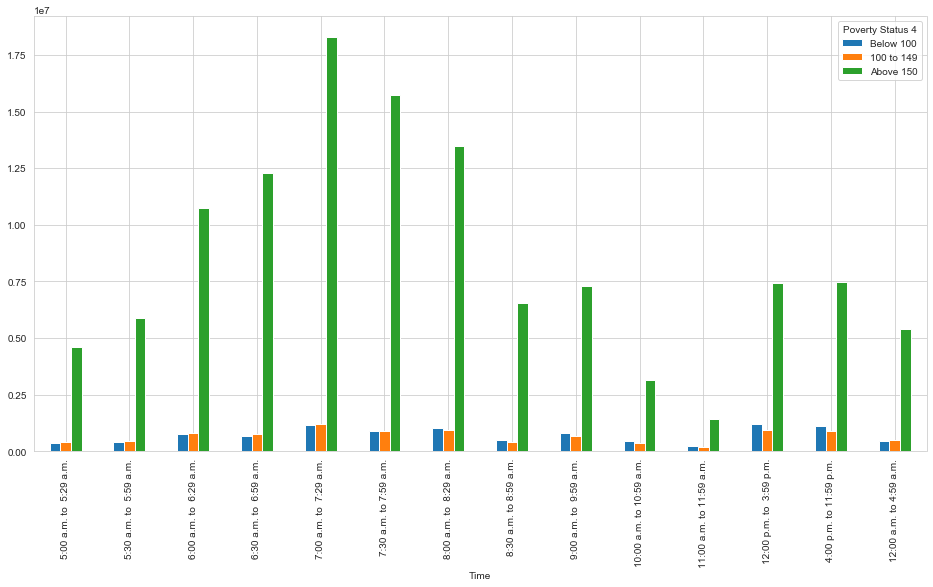

In [57]:
totalworkersbytime_pivot.plot(figsize=(16,8),kind='bar')

In [ ]:
#the wealthier have much closer to a normal distribution around departure times. The poorer leave in equal proportions throughought the day.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B4CBEB208>,
      dtype=object)

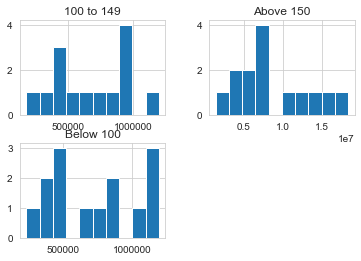

In [58]:
# note to self: the below histograms are counting the number of times blank time falls within a bin. 
#i.e. 5:30, 7:30, and 8:00 all have a # of people somewhere from .5-.75 x10^7.,
#thus, it has a count of 3 along the y axis.
totalworkersbytime_pivot.hist()